# Binomial Tree for European/American Options

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
S0 = 100.0              # spot stock price
K = 100.0               # strike
T = 1.0                 # maturity 
r = 0.1                 # risk free rate 
sig = 0.2               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [4]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [5]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [6]:

S

array([[100.        , 112.24009024, 125.97837858, 141.39824581],
       [  0.        ,  89.09472523, 100.        , 112.24009024],
       [  0.        ,   0.        ,  79.37870064,  89.09472523],
       [  0.        ,   0.        ,   0.        ,  70.72223522]])

In [7]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.6176090164403981

In [8]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [9]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 4.15461967,  1.49175992,  0.        ,  0.        ],
       [ 0.        ,  8.82373471,  4.0333673 ,  0.        ],
       [ 0.        ,  0.        , 17.34290941, 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [10]:
print('European ' + payoff, str( V[0,0]))

European put 4.154619665678642


In [11]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 4.92448707,  1.49175992,  0.        ,  0.        ],
       [ 0.        , 10.90527477,  4.0333673 ,  0.        ],
       [ 0.        ,  0.        , 20.62129936, 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [12]:
print('American ' + payoff, str( V[0,0]))


American put 4.924487073316837


# MONTE CARLO SIMULATION

In [14]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [15]:
T = 1
r = 0.1
sigma = 0.2
S0 = 100
K = 100

In [16]:
S = mcs_simulation_np(1000)

In [17]:
S = np.transpose(S)
S

array([[100.        ,  99.04934836,  99.61940573, ..., 117.48824643,
        117.01762739, 117.41498437],
       [100.        , 100.29148294, 100.59727439, ..., 110.87749555,
        111.14703135, 111.41333557],
       [100.        ,  99.56268819, 100.08232229, ..., 112.41342916,
        113.83332409, 113.50295398],
       ...,
       [100.        , 100.3375084 ,  99.82441007, ...,  78.07023778,
         78.35260778,  78.60332428],
       [100.        , 100.43793325, 100.17529753, ..., 113.66841175,
        111.92524201, 111.8320857 ],
       [100.        ,  99.60869368,  98.20472878, ...,  98.18915919,
         98.19278673,  97.66109384]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

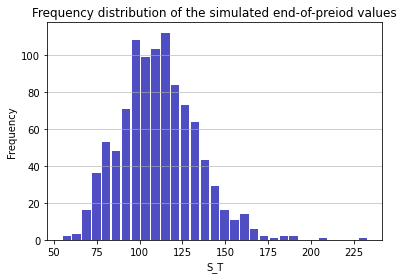

In [18]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [19]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 4.101224523757464


In [20]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 15.0449997564044
